In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR



%matplotlib inline

In [2]:
prices = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-3/master/Data/CaseStudy/house.csv')
prices.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
prices.shape

(1460, 81)

In [5]:
prices.select_dtypes(include=['object']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
MSZoning         1460 non-null object
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 non-null object
ExterQual        1460 non-null object
ExterCond        1460 non-null object
Foundation       1460 non-null object
BsmtQual         1423 non-null object
BsmtCond         1423 non-null object
BsmtExposure     1422

In [6]:
prices_objects = prices.select_dtypes(include=['object']).copy()
prices_cont = prices.select_dtypes(exclude=['object']).copy()

In [7]:
prices_objects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
MSZoning         1460 non-null object
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 non-null object
ExterQual        1460 non-null object
ExterCond        1460 non-null object
Foundation       1460 non-null object
BsmtQual         1423 non-null object
BsmtCond         1423 non-null object
BsmtExposure     1422

In [8]:
prices_cont.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
MasVnrArea       1452 non-null float64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
LowQualFinSF     1460 non-null int64
GrLivArea        1460 non-null int64
BsmtFullBath     1460 non-null int64
BsmtHalfBath     1460 non-null int64
FullBath         1460 non-null int64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
F

In [9]:
prices_cont = prices_cont.drop(['Id'],axis=1)
prices_cont.isnull().sum()

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [10]:
prices_cont['LotFrontage'] = prices_cont['LotFrontage'].fillna(prices['LotFrontage'].mean())
prices_cont['MasVnrArea'] = prices_cont['MasVnrArea'].fillna(prices['MasVnrArea'].mean())
prices_cont['GarageYrBlt'] = prices_cont['GarageYrBlt'].fillna(prices['GarageYrBlt'].mean())
prices_cont.isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [11]:
prices_objects.isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [12]:
prices_objects = prices_objects.drop(['Alley','PoolQC', 'Fence', 'MiscFeature','FireplaceQu'], axis=1)
prices_objects.isnull().sum()

MSZoning          0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        8
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
KitchenQual       0
Functional        0
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
PavedDrive        0
SaleType          0
SaleCondition     0
dtype: int64

In [13]:
prices_objects['BsmtQual'] = prices_objects['BsmtQual'].fillna(prices_objects['BsmtQual'].value_counts().index[0])
prices_objects['BsmtExposure'] = prices_objects['BsmtExposure'].fillna(
                                        prices_objects['BsmtExposure'].value_counts().index[0])
prices_objects['BsmtFinType1'] = prices_objects['BsmtFinType1'].fillna(
                                        prices_objects['BsmtFinType1'].value_counts().index[0])
prices_objects['BsmtFinType2'] = prices_objects['BsmtFinType2'].fillna(
                                        prices_objects['BsmtFinType2'].value_counts().index[0])
prices_objects['Electrical'] = prices_objects['Electrical'].fillna(
                                        prices_objects['Electrical'].value_counts().index[0])
prices_objects['GarageType'] = prices_objects['GarageType'].fillna(
                                        prices_objects['GarageType'].value_counts().index[0])
prices_objects['GarageFinish'] = prices_objects['GarageFinish'].fillna(
                                        prices_objects['GarageFinish'].value_counts().index[0])
prices_objects['GarageQual'] = prices_objects['GarageQual'].fillna(
                                        prices_objects['GarageQual'].value_counts().index[0])
prices_objects['GarageCond'] = prices_objects['GarageCond'].fillna(
                                        prices_objects['GarageCond'].value_counts().index[0])
prices_objects['MasVnrType'] = prices_objects['MasVnrType'].fillna(
                                        prices_objects['MasVnrType'].value_counts().index[0])
prices_objects['BsmtCond'] = prices_objects['BsmtCond'].fillna(
                                        prices_objects['BsmtCond'].value_counts().index[0])

In [14]:
prices_objects.isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

In [15]:
encoder = ce.BackwardDifferenceEncoder(cols=['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 
            'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2','BldgType', 'HouseStyle',
            'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond',
            'Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC',
            'CentralAir','Electrical','KitchenQual','Functional','GarageType','GarageFinish',
            'GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition'])

In [16]:
encoder.fit(prices_objects)
prices_objects_BackDiffEnc = encoder.transform(prices_objects)
prices_objects_BackDiffEnc.head()

,intercept,MSZoning_0,MSZoning_1,MSZoning_2,MSZoning_3,Street_0,LotShape_0,LotShape_1,LotShape_2,LandContour_0,...,SaleType_3,SaleType_4,SaleType_5,SaleType_6,SaleType_7,SaleCondition_0,SaleCondition_1,SaleCondition_2,SaleCondition_3,SaleCondition_4
0,1,-0.8,-0.6,-0.4,-0.2,-0.5,-0.75,-0.5,-0.25,-0.75,...,-0.555556,-0.444444,-0.333333,-0.222222,-0.111111,-0.833333,-0.666667,-0.5,-0.333333,-0.166667
1,1,-0.8,-0.6,-0.4,-0.2,-0.5,-0.75,-0.5,-0.25,-0.75,...,-0.555556,-0.444444,-0.333333,-0.222222,-0.111111,-0.833333,-0.666667,-0.5,-0.333333,-0.166667
2,1,-0.8,-0.6,-0.4,-0.2,-0.5,0.25,-0.5,-0.25,-0.75,...,-0.555556,-0.444444,-0.333333,-0.222222,-0.111111,-0.833333,-0.666667,-0.5,-0.333333,-0.166667
3,1,-0.8,-0.6,-0.4,-0.2,-0.5,0.25,-0.5,-0.25,-0.75,...,-0.555556,-0.444444,-0.333333,-0.222222,-0.111111,0.166667,-0.666667,-0.5,-0.333333,-0.166667
4,1,-0.8,-0.6,-0.4,-0.2,-0.5,0.25,-0.5,-0.25,-0.75,...,-0.555556,-0.444444,-0.333333,-0.222222,-0.111111,-0.833333,-0.666667,-0.5,-0.333333,-0.166667


In [17]:
Ytrain = prices_cont.SalePrice
prices_cont = prices_cont.drop(['SalePrice'], axis=1)
prices_corpus = pd.concat([prices_cont, prices_objects_BackDiffEnc], axis=1)

In [18]:
min_max_scaler = preprocessing.MinMaxScaler()
X = pd.DataFrame(min_max_scaler.fit_transform(prices_corpus), columns = prices_corpus.columns)
X.head()

C:\Users\aaacharya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_3,SaleType_4,SaleType_5,SaleType_6,SaleType_7,SaleCondition_0,SaleCondition_1,SaleCondition_2,SaleCondition_3,SaleCondition_4
0,0.235294,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.12250,0.125089,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.00000,0.173281,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.235294,0.160959,0.046507,0.666667,0.500,0.934783,0.866667,0.10125,0.086109,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.294118,0.133562,0.038561,0.666667,0.500,0.311594,0.333333,0.00000,0.038271,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.235294,0.215753,0.060576,0.777778,0.500,0.927536,0.833333,0.21875,0.116052,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
prices_test = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-3/master/Data/CaseStudy/house_test.csv')

In [20]:
prices_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [21]:
prices_objects_test = prices_test.select_dtypes(include=['object']).copy()

prices_test = prices_test.select_dtypes(exclude=['object']).copy()
prices_test = prices_test.drop(['Id'],axis=1)

prices_objects_test = prices_objects_test.drop(['Alley','PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu'], axis=1)

prices_objects_test['MSZoning'] = prices_objects_test['MSZoning'].fillna(
                                        prices_objects_test['MSZoning'].value_counts().index[0])
prices_objects_test['Utilities'] = prices_objects_test['Utilities'].fillna(
                                        prices_objects_test['Utilities'].value_counts().index[0])
prices_objects_test['Exterior1st'] = prices_objects_test['Exterior1st'].fillna(
                                        prices_objects_test['Exterior1st'].value_counts().index[0])
prices_objects_test['Exterior2nd'] = prices_objects_test['Exterior2nd'].fillna(
                                        prices_objects_test['Exterior2nd'].value_counts().index[0])
prices_objects_test['BsmtCond'] = prices_objects_test['BsmtCond'].fillna(
                                        prices_objects_test['BsmtCond'].value_counts().index[0])
prices_objects_test['KitchenQual'] = prices_objects_test['KitchenQual'].fillna(
                                        prices_objects_test['KitchenQual'].value_counts().index[0])
prices_objects_test['Functional'] = prices_objects_test['Functional'].fillna(
                                        prices_objects_test['Functional'].value_counts().index[0])
prices_objects_test['SaleType'] = prices_objects_test['SaleType'].fillna(
                                        prices_objects_test['SaleType'].value_counts().index[0])
prices_objects_test['BsmtQual'] = prices_objects_test['BsmtQual'].fillna(
                                        prices_objects_test['BsmtQual'].value_counts().index[0])
prices_objects_test['BsmtExposure'] = prices_objects_test['BsmtExposure'].fillna(
                                        prices_objects_test['BsmtExposure'].value_counts().index[0])
prices_objects_test['BsmtFinType1'] = prices_objects_test['BsmtFinType1'].fillna(
                                        prices_objects_test['BsmtFinType1'].value_counts().index[0])
prices_objects_test['BsmtFinType2'] = prices_objects_test['BsmtFinType2'].fillna(
                                        prices_objects_test['BsmtFinType2'].value_counts().index[0])
prices_objects_test['Electrical'] = prices_objects_test['Electrical'].fillna(
                                        prices_objects_test['Electrical'].value_counts().index[0])
prices_objects_test['GarageType'] = prices_objects_test['GarageType'].fillna(
                                        prices_objects_test['GarageType'].value_counts().index[0])
prices_objects_test['GarageFinish'] = prices_objects_test['GarageFinish'].fillna(
                                        prices_objects_test['GarageFinish'].value_counts().index[0])
prices_objects_test['GarageQual'] = prices_objects_test['GarageQual'].fillna(
                                        prices_objects_test['GarageQual'].value_counts().index[0])
prices_objects_test['GarageCond'] = prices_objects_test['GarageCond'].fillna(
                                        prices_objects_test['GarageCond'].value_counts().index[0])
prices_objects_test['MasVnrType'] = prices_objects_test['MasVnrType'].fillna(
                                        prices_objects_test['MasVnrType'].value_counts().index[0])


prices_test['LotFrontage'] = prices_test['LotFrontage'].fillna(prices_test['LotFrontage'].mean())
prices_test['MasVnrArea'] = prices_test['MasVnrArea'].fillna(prices_test['MasVnrArea'].mean())
prices_test['GarageYrBlt'] = prices_test['GarageYrBlt'].fillna(prices_test['GarageYrBlt'].mean())
prices_test['BsmtFinSF1'] = prices_test['BsmtFinSF1'].fillna(prices_test['BsmtFinSF1'].mean())
prices_test['BsmtFinSF2'] = prices_test['BsmtFinSF2'].fillna(prices_test['BsmtFinSF2'].mean())
prices_test['BsmtUnfSF'] = prices_test['BsmtUnfSF'].fillna(prices_test['BsmtUnfSF'].mean())
prices_test['TotalBsmtSF'] = prices_test['TotalBsmtSF'].fillna(prices_test['TotalBsmtSF'].mean())
prices_test['BsmtFullBath'] = prices_test['BsmtFullBath'].fillna(prices_test['BsmtFullBath'].mean())
prices_test['BsmtHalfBath'] = prices_test['BsmtHalfBath'].fillna(prices_test['BsmtHalfBath'].mean())
prices_test['GarageCars'] = prices_test['GarageCars'].fillna(prices_test['GarageCars'].mean())
prices_test['GarageArea'] = prices_test['GarageArea'].fillna(prices_test['GarageArea'].mean())

In [22]:
#applying encoder and min max scaler on test dataset.

prices_objects_BackDiffEnc_test = encoder.transform(prices_objects_test)
prices_corpus_test = pd.concat([prices_test, prices_objects_BackDiffEnc_test], axis=1)

Xtest = pd.DataFrame(min_max_scaler.transform(prices_corpus_test), columns = prices_corpus_test.columns)

In [23]:
pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Text(0, 0.5, 'Variance Ratio')

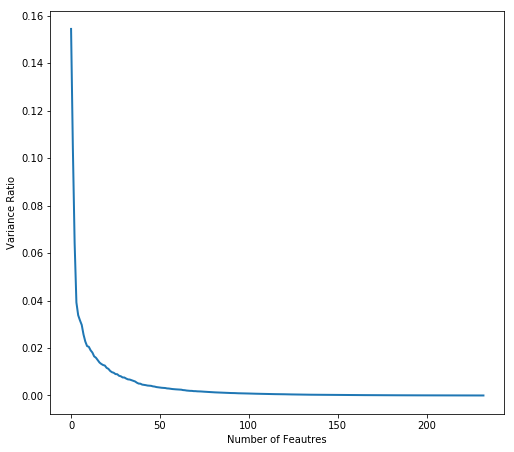

In [24]:
plt.figure(1, figsize=(9, 8))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('Number of Feautres')
plt.ylabel('Variance Ratio')

In [25]:
pca = PCA(n_components=25)

In [26]:
pca.fit(X)
Xtrain_pca = pca.transform(X)
Xtest_pca = pca.transform(Xtest)

In [27]:
reg2 = SVR(C=0.7, epsilon=0.2, kernel='poly')
reg2.fit(Xtrain_pca, Ytrain)
Ypredict_test = reg2.predict(Xtest_pca)

C:\Users\aaacharya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [28]:
Ypredict_test = reg2.predict(Xtest_pca)

In [32]:
test = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-3/master/Data/CaseStudy/house_test.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [33]:
Ypred = pd.DataFrame({'SalePrice':Ypredict_test})
prediction = pd.concat([test['Id'], Ypred], axis=1)

In [34]:
prediction = pd.concat([test['Id'], Ypred], axis=1)
prediction.head()

,Id,SalePrice
0,1461,162999.956886
1,1462,163000.429353
2,1463,163004.189058
3,1464,163004.917713
4,1465,163003.115755


In [35]:
from sklearn import metrics

In [36]:
Ypredict_train = reg2.predict(Xtrain_pca)

In [37]:
MSE_train = metrics.mean_squared_error(Ytrain, Ypredict_train)
print('MSE for training set is {}'.format(MSE_train))

MSE for training set is 6627561892.44428


In [38]:
RMSE_train = np.sqrt( metrics.mean_squared_error(Ytrain, Ypredict_train))
print('RMSE for training set is {}'.format(RMSE_train))

RMSE for training set is 81409.83903954287
